<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Functions Definition


In [8]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#  data set
x_train = np.array([1.0, 3.0, 2.0, 5.0, 7.0])  # features
y_train = np.array([300.0, 500.0, 350.0, 600.0, 700.0])  # target value

### Dibujamos datos


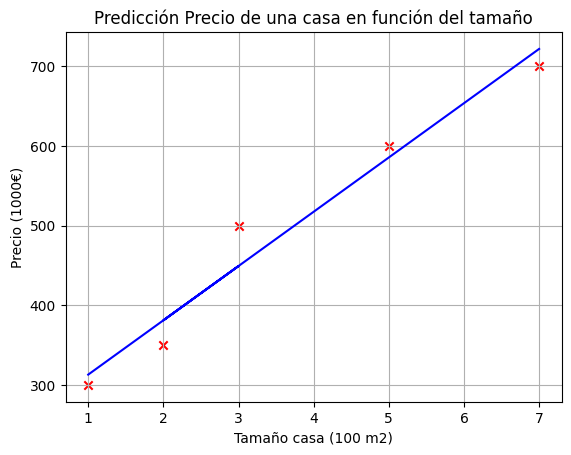

In [13]:
plt.scatter(x_train, y_train, marker="x", color="r")
plt.plot(x_train, w_final * x_train + b_final, color="b")
plt.xlabel("Tamaño casa (100 m2)")
plt.ylabel("Precio (1000€)")
plt.title("Predicción Precio de una casa en función del tamaño")
plt.grid(True)
plt.show()

## Gradiente Descendente

Nos planteamos un modelo (hipótesis)
$h_{\theta}(x)=\theta^{T} x=\theta_0+\theta_1x_1$

Debemos encontrar los parámetros  $\theta$  a partir de nuestro conjunto de datos utilizando la técnica del gradiente descendente.

#### 1.- Fundamentos

El objetivo de la regresión lineal es minimizar la función de coste

$J(\theta)=\frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$

donde la hipótesis $h_{\theta}(x)$ está dada por el modelo lineal

$h_{\theta}(x)=\theta^{T} x=\theta_0+\theta_1x_1$

Debemnos encontrar son los valores de $\theta_j$ que son los parámetros de nuestro modelo y que minimicen la función de coste $J(\theta)$. Utilizaremos el algoritmo iterativo del gradiente descendente visto en clase.

En cada iteración del algoritmo debemos realizar la actualización de los valores  $\theta_j$ de acuerdo a .

$\theta_j:=\theta_j-\alpha\frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$ (actualización simultánea de $\theta_j$ para todo $j$)

En cada iteración, ols parámetros $\theta_j$ se aproximan al valor óptimo que nos permite obrener el valor mínimo de $J(\theta)$.

#### 2.- Implementación

Recordar que debemos añadir una columna de 1's al inicio de nuestro conjunto de datos para poder  calcular en el mismo paso  $\theta_0$ y debemos inicializar  $\theta_j$ a $0$.

In [2]:

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 100000
tmp_alpha = 9.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train,
    y_train,
    w_init,
    b_init,
    tmp_alpha,
    iterations,
    compute_cost,
    compute_gradient,
)
print(f"(w,b) found by gradient descent: ({w_final:.4f},{b_final:.4f})")

(w,b) found by gradient descent: (68.1034,244.8276)


In [1]:

# Function to calculate the cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost

    return total_cost


# Function to calculate the derivatives
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db


def gradient_descent(
    x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function
):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        J_history.append(cost_function(x, y, w, b))
        p_history.append([w, b])

        if b == 0 and w == 0:
            break

    return w, b, J_history, p_history  # return w and J,w history for graphing

### Load data & Calling gradient_descent


### Plot the prediction


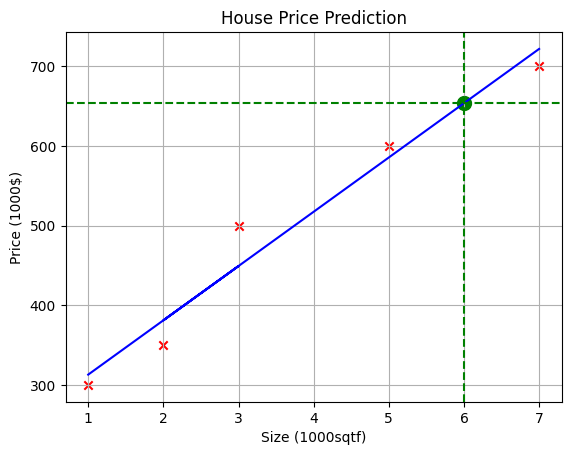

6000 sqft house prediction 653.4 Thousand dollars


In [4]:
plt.scatter(x_train, y_train, marker="x", color="r")
plt.plot(x_train, w_final * x_train + b_final, color="b")
plt.xlabel("Size (1000sqtf)")
plt.ylabel("Price (1000$)")
plt.title("House Price Prediction")
plt.grid(True)

target_x = 6.0
target_y = w_final * target_x + b_final
plt.scatter(target_x, target_y, marker="o", color="g", s=100)

plt.axhline(y=target_y, color="g", linestyle="--")
plt.axvline(x=target_x, color="g", linestyle="--")

plt.show()


print(f"6000 sqft house prediction {w_final*6.0 + b_final:0.1f} Thousand dollars")

### Plot the cost function VS number of iterations


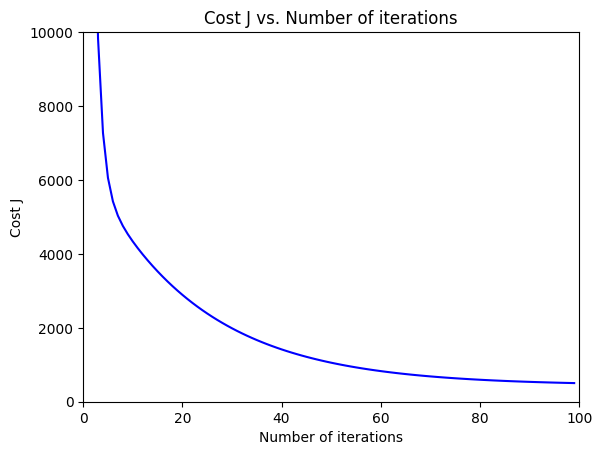

In [5]:
nb_iterations = np.arange(1, 100)
j = J_hist[1:100]
plt.plot(nb_iterations, j, color="b")
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.title("Cost J vs. Number of iterations")
plt.xlim(0, 100)
plt.ylim(0, 10000)
plt.show()